# Implementación del Perceptrón - Clasificador Lineal
#
## 1.1 Fundamentos de la técnica (breve resumen)
El Perceptrón es uno de los algoritmos más simples para clasificación lineal, desarrollado por Frank Rosenblatt en 1957. Es una unidad básica de las redes neuronales artificiales que puede aprender a clasificar patrones linealmente separables.
#
**Características principales:**
- Clasificador binario
- Aprendizaje supervisado
- Modelo lineal
- Algoritmo de aprendizaje iterativo
- Función de activación escalón (Heaviside)

## 1.2 Modelo Matemático del Perceptrón
#
**Ecuación del Perceptrón:**
#
# $$ y = f(\sum_{i=1}^{n} w_i x_i + b) $$
#
Donde:
- $x_i$: Variables de entrada (features)
- $w_i$: Pesos (weights)
- $b$: Término de sesgo (bias)
- $f$: Función de activación (escalón unitario)
#
**Función de activación:**
$$ f(z) = \begin{cases}
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0
\end{cases} $$
#
**Regla de aprendizaje:**
$$ w_i^{(nuevo)} = w_i^{(anterior)} + \eta (y_{verdadero} - y_{predicho}) x_i $$
$$ b^{(nuevo)} = b^{(anterior)} + \eta (y_{verdadero} - y_{predicho}) $$
#
## 1.3 Librerías, clases y funciones empleadas

### **NumPy (np)**
- **`np.random.randn()`**: Genera números aleatorios desde distribución normal estándar
- **`np.dot()`**: Calcula producto punto entre arrays/matrices
- **`np.where()`**: Selecciona elementos de arrays según condición booleana
- **`np.random.seed()`**: Fija semilla para reproducibilidad de números aleatorios
- **`np.bincount()`**: Cuenta ocurrencias de valores en array de enteros
- **`np.arange()`**: Genera valores espaciados uniformemente en intervalo
- **`np.meshgrid()`**: Crea matrices de coordenadas para gráficos 2D/3D
- **`np.reshape()`**: Cambia forma de array sin modificar datos
- **`np.c_[]`**: Concatena arrays a lo largo del eje de columnas
- **`np.random.choice()`**: Genera muestra aleatoria de array dado
- **`np.zeros()`**: Crea array lleno de ceros

### **Matplotlib (plt)**
- **`plt.figure()`**: Crea nueva figura para gráficos
- **`plt.scatter()`**: Genera gráfico de dispersión
- **`plt.plot()`**: Crea gráfico de líneas
- **`plt.title()`**: Establece título del gráfico
- **`plt.xlabel()`/`plt.ylabel()`**: Añade etiquetas a ejes
- **`plt.legend()`**: Muestra leyenda en gráfico
- **`plt.grid()`**: Activa/desactiva grid del gráfico
- **`plt.show()`**: Muestra gráfico en pantalla
- **`plt.contourf()`**: Crea gráfico de contorno relleno
- **`plt.colorbar()`**: Añade barra de colores a gráfico
- **`plt.subplots()`**: Crea figura con subgráficos

### **Scikit-learn**
- **`make_classification()`**: Genera dataset sintético para clasificación
- **`train_test_split()`**: Divide dataset en entrenamiento y prueba
- **`accuracy_score()`**: Calcula precisión de clasificación
- **`confusion_matrix()`**: Genera matriz de confusión
- **`classification_report()`**: Reporte detallado de métricas de clasificación

### **Seaborn (sns)**
- **`sns.set_palette()`**: Establece paleta de colores para gráficos
- **`sns.heatmap()`**: Crea mapa de calor para visualizar matrices

### **Pandas (pd)**
- **`pd.DataFrame()`**: Crea estructura de datos tabular (DataFrame)

### **Scikit-learn Perceptron**
- **`SklearnPerceptron()`**: Implementación oficial de Perceptrón
- **`.fit()`**: Entrena modelo con datos de entrenamiento
- **`.predict()`**: Realiza predicciones con modelo entrenado
- **`.score()`**: Calcula precisión del modelo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.linear_model import LogisticRegression
import pandas as pd

**Configuración del estilo para los gráficos.**

In [2]:
plt.style.use('default')
sns.set_palette("husl")

**Implementación personalizada del modelo.**

In [3]:
class Perceptron:
    """
    Implementación del algoritmo Perceptrón para clasificación binaria
    """

    def __init__(self, learning_rate=0.01, n_iter=1000, random_state=42):
        """
        Inicializa el perceptrón

        Parámetros:
        - learning_rate: Tasa de aprendizaje (eta)
        - n_iter: Número de iteraciones de entrenamiento
        - random_state: Semilla para reproducibilidad
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.errors_ = []

    def activation_function(self, z):
        """
        Función de activación escalón unitario
        """
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        """
        Entrena el modelo Perceptrón

        Parámetros:
        - X: Matriz de características (n_samples, n_features)
        - y: Vector de etiquetas (n_samples,)
        """
        # Inicializar pesos y sesgo
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0

        # Entrenamiento iterativo
        for epoch in range(self.n_iter):
            total_error = 0
            for idx, x_i in enumerate(X):
                # Calcular predicción
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_function(linear_output)

                # Calcular error y actualizar pesos
                error = y[idx] - y_pred
                if error != 0:
                    self.weights += self.learning_rate * error * x_i
                    self.bias += self.learning_rate * error
                    total_error += 1

            self.errors_.append(total_error)

            # Criterio de parada temprana
            if total_error == 0:
                print(f"Convergió en la iteración {epoch + 1}")
                break

        return self

    def predict(self, X):
        """
        Realiza predicciones

        Parámetros:
        - X: Matriz de características

        Retorna:
        - y_pred: Vector de predicciones
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

    def score(self, X, y):
        """
        Calcula la precisión del modelo

        Parámetros:
        - X: Matriz de características
        - y: Vector de etiquetas verdaderas

        Retorna:
        - accuracy: Precisión del modelo
        """
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

## 1.4 Pipeline de Machine Learning
### 1.4.1 Feature Engineering
Generación de un dataset sintético.

In [4]:
print("=== GENERACIÓN DEL DATASET ===")
X, y = make_classification(
    n_samples=1000,           # 1000 muestras
    n_features=2,             # 2 características para visualización
    n_redundant=0,            # Sin características redundantes
    n_informative=2,          # 2 características informativas
    n_clusters_per_class=1,   # 1 cluster por clase
    random_state=42,
    class_sep=1.5             # Separación entre clases
)

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Distribución de clases: {np.bincount(y)}")

=== GENERACIÓN DEL DATASET ===
Forma de X: (1000, 2)
Forma de y: (1000,)
Distribución de clases: [501 499]


Visualización del Dataset.

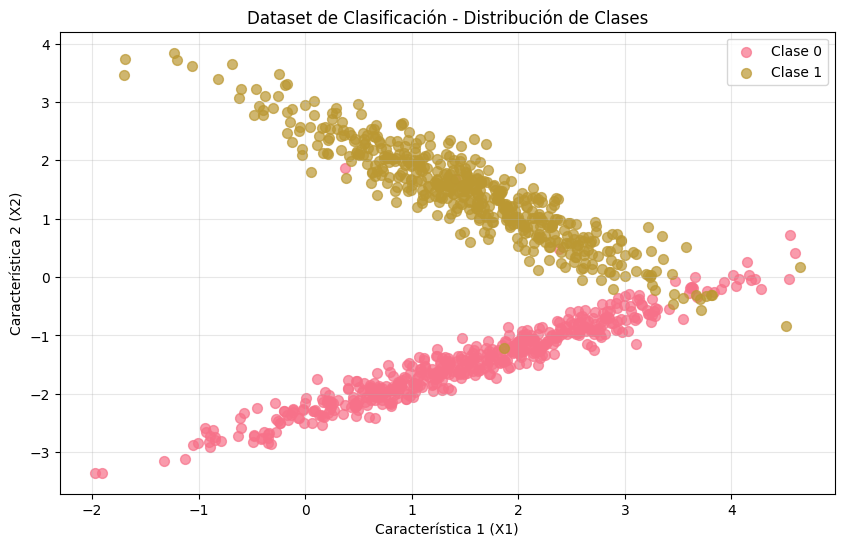

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.7, label='Clase 0', s=50)
plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.7, label='Clase 1', s=50)
plt.title('Dataset de Clasificación - Distribución de Clases')
plt.xlabel('Característica 1 (X1)')
plt.ylabel('Característica 2 (X2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Se divide el conjunto en subconjuntos de entrenamiento y prueba.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("=== DIVISIÓN DE DATOS ===")
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")
print(f"Distribución en entrenamiento: {np.bincount(y_train)}")
print(f"Distribución en prueba: {np.bincount(y_test)}")

=== DIVISIÓN DE DATOS ===
Conjunto de entrenamiento: 700 muestras
Conjunto de prueba: 300 muestras
Distribución en entrenamiento: [351 349]
Distribución en prueba: [150 150]


### 1.4.2 Selección del modelo
Este modelo puede selecionarse cuando el problema que se desea resolver cubre alguna de estas necesidades:
1. El dataset es linealmente separable (ver gráfico anterior)
2. Problema de clasificación binaria
3. Simplicidad computacional
4. Interpretabilidad del modelo
5. Bajo riesgo de sobreajuste para datos linealmente separables

En el siguiente paso, se va a entrenar el modelo de manera rápida para verificar la separabilidad de los datos.



In [7]:
temp_model = LogisticRegression()
temp_model.fit(X_train, y_train)
temp_score = temp_model.score(X_test, y_test)
print(f"\nPrecisión de referencia con Regresión Logística: {temp_score:.4f}")
print("Una alta precisión sugiere que los datos son linealmente separables")


Precisión de referencia con Regresión Logística: 0.9467
Una alta precisión sugiere que los datos son linealmente separables


### 1.4.3 Entrenamiento del modelo

In [8]:
# Crear y entrenar el modelo
perceptron = Perceptron(learning_rate=0.1, n_iter=1000)
perceptron.fit(X_train, y_train)

print("Entrenamiento completado!")
print(f"Pesos finales: {perceptron.weights}")
print(f"Sesgo final: {perceptron.bias}")

Entrenamiento completado!
Pesos finales: [0.36031024 1.67040285]
Sesgo final: 0.20000000000000004


Visualización del proceso de aprendizaje.

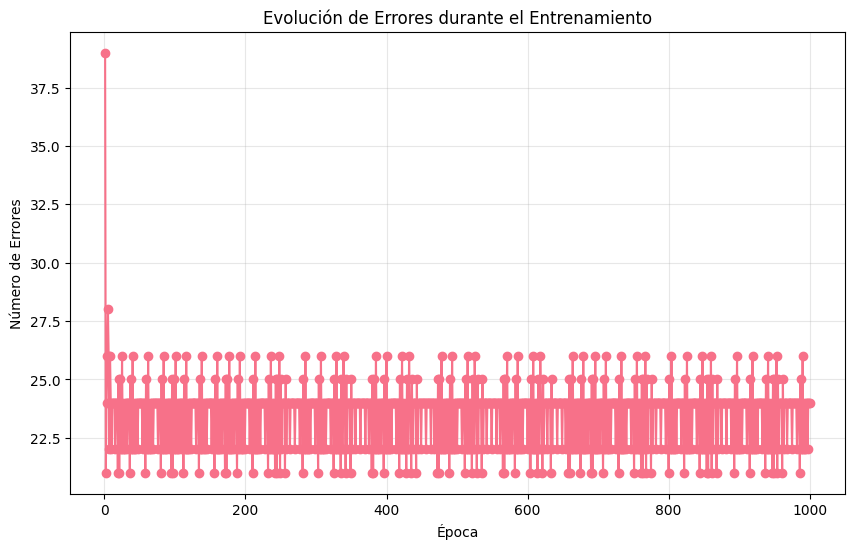

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.title('Evolución de Errores durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Número de Errores')
plt.grid(True, alpha=0.3)
plt.show()

Visualización de la frontera de decisión.

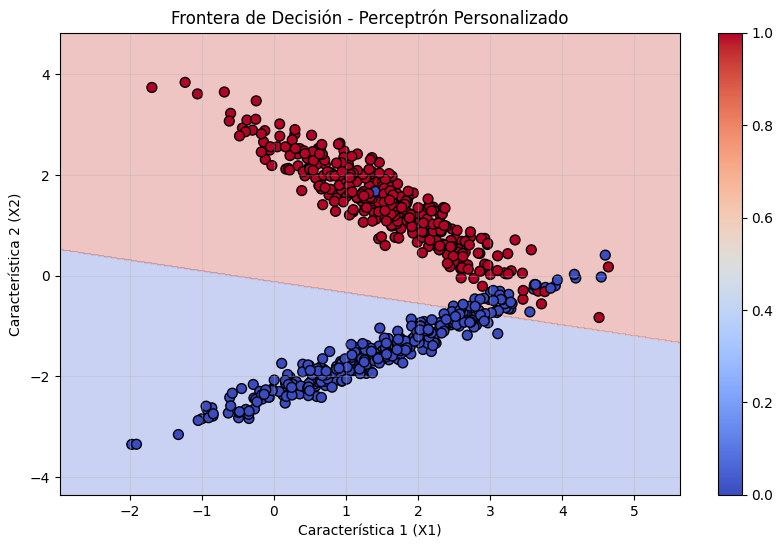

In [10]:
def plot_decision_boundary(model, X, y, title):
    """
    Función para visualizar la frontera de decisión
    """
    # Crear mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predecir en el mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Característica 1 (X1)')
    plt.ylabel('Característica 2 (X2)')
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualizar frontera de decisión
plot_decision_boundary(perceptron, X_train, y_train,
                      'Frontera de Decisión - Perceptrón Personalizado')

### 1.4.4 Predicción

In [11]:
def test_prediction(model, X_sample, y_true=None, feature_names=None):
    """
    Función para probar y mostrar la clasificación de patrones individuales
    """
    if feature_names is None:
        feature_names = [f'Feature_{i+1}' for i in range(X_sample.shape[1])]

    # Realizar predicción
    prediction = model.predict(X_sample.reshape(1, -1))[0]

    print("=== PRUEBA DE PREDICCIÓN ===")
    print("Patrón de entrada:")
    for i, (name, value) in enumerate(zip(feature_names, X_sample)):
        print(f"  {name}: {value:.4f}")

    print(f"Predicción: Clase {prediction}")

    if y_true is not None:
        print(f"Valor verdadero: Clase {y_true}")
        print(f"Resultado: {'✓ CORRECTO' if prediction == y_true else '✗ INCORRECTO'}")

    return prediction

# %%
# Probar con algunos patrones del conjunto de prueba
print("PRUEBAS DE PREDICCIÓN INDIVIDUALES:\n")

# Probar 5 muestras aleatorias
np.random.seed(42)
test_indices = np.random.choice(len(X_test), 5, replace=False)

for i, idx in enumerate(test_indices):
    print(f"\n--- Prueba {i+1} ---")
    test_prediction(perceptron, X_test[idx], y_test[idx],
                   ['X1', 'X2'])

# %%
# Predicciones en todo el conjunto de prueba
y_pred = perceptron.predict(X_test)

print("=== PREDICCIONES EN CONJUNTO DE PRUEBA ===")
print("Primeras 10 predicciones vs valores reales:")
comparison = pd.DataFrame({
    'Real': y_test[:10],
    'Predicho': y_pred[:10],
    'Correcto': y_test[:10] == y_pred[:10]
})
print(comparison)

PRUEBAS DE PREDICCIÓN INDIVIDUALES:


--- Prueba 1 ---
=== PRUEBA DE PREDICCIÓN ===
Patrón de entrada:
  X1: 1.6141
  X2: 1.4255
Predicción: Clase 1
Valor verdadero: Clase 1
Resultado: ✓ CORRECTO

--- Prueba 2 ---
=== PRUEBA DE PREDICCIÓN ===
Patrón de entrada:
  X1: 2.7096
  X2: -0.9771
Predicción: Clase 0
Valor verdadero: Clase 0
Resultado: ✓ CORRECTO

--- Prueba 3 ---
=== PRUEBA DE PREDICCIÓN ===
Patrón de entrada:
  X1: 3.7065
  X2: -0.3726
Predicción: Clase 1
Valor verdadero: Clase 1
Resultado: ✓ CORRECTO

--- Prueba 4 ---
=== PRUEBA DE PREDICCIÓN ===
Patrón de entrada:
  X1: 2.0228
  X2: -1.2670
Predicción: Clase 0
Valor verdadero: Clase 0
Resultado: ✓ CORRECTO

--- Prueba 5 ---
=== PRUEBA DE PREDICCIÓN ===
Patrón de entrada:
  X1: -1.1992
  X2: 3.7267
Predicción: Clase 1
Valor verdadero: Clase 1
Resultado: ✓ CORRECTO
=== PREDICCIONES EN CONJUNTO DE PRUEBA ===
Primeras 10 predicciones vs valores reales:
   Real  Predicho  Correcto
0     1         1      True
1     1         1    

### 1.4.5 Evaluación del modelo

In [12]:
# Evaluación del modelo
print("=== EVALUACIÓN DEL MODELO ===")

# Métrica Accuracy
accuracy = perceptron.score(X_test, y_test)
print(f"Accuracy (Precisión): {accuracy:.4f}")
print(f"Accuracy (%): {accuracy * 100:.2f}%")

=== EVALUACIÓN DEL MODELO ===
Accuracy (Precisión): 0.9100
Accuracy (%): 91.00%


Matriz de confusión

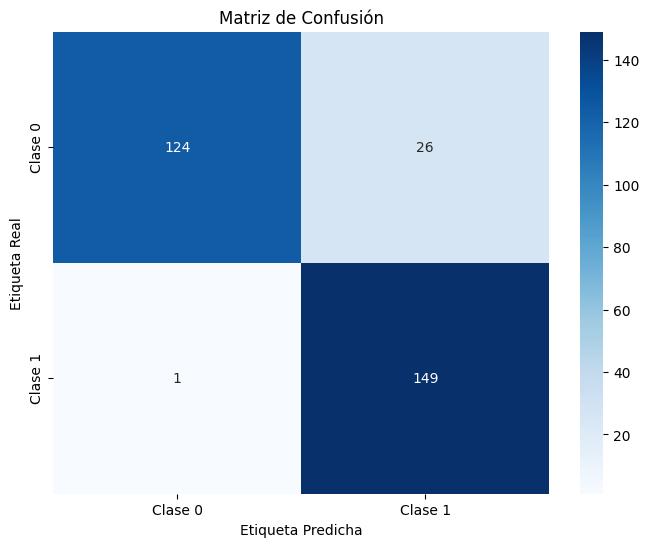

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

Reporte de clasificación detallado.

In [14]:
print("=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred, target_names=['Clase 0', 'Clase 1']))

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

     Clase 0       0.99      0.83      0.90       150
     Clase 1       0.85      0.99      0.92       150

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



Comparación con implementaciónd de sklearn.

In [15]:

print("=== COMPARACIÓN CON SKLEARN ===")
sklearn_perceptron = SklearnPerceptron(
    alpha=0.0,  # Sin regularización para comparación justa
    max_iter=1000,
    random_state=42
)
sklearn_perceptron.fit(X_train, y_train)
sklearn_accuracy = sklearn_perceptron.score(X_test, y_test)

print(f"Accuracy Perceptrón Personalizado: {accuracy:.4f}")
print(f"Accuracy Perceptrón Sklearn: {sklearn_accuracy:.4f}")

=== COMPARACIÓN CON SKLEARN ===
Accuracy Perceptrón Personalizado: 0.9100
Accuracy Perceptrón Sklearn: 0.9567


Visualización comparativa de las fronteras de decisión.

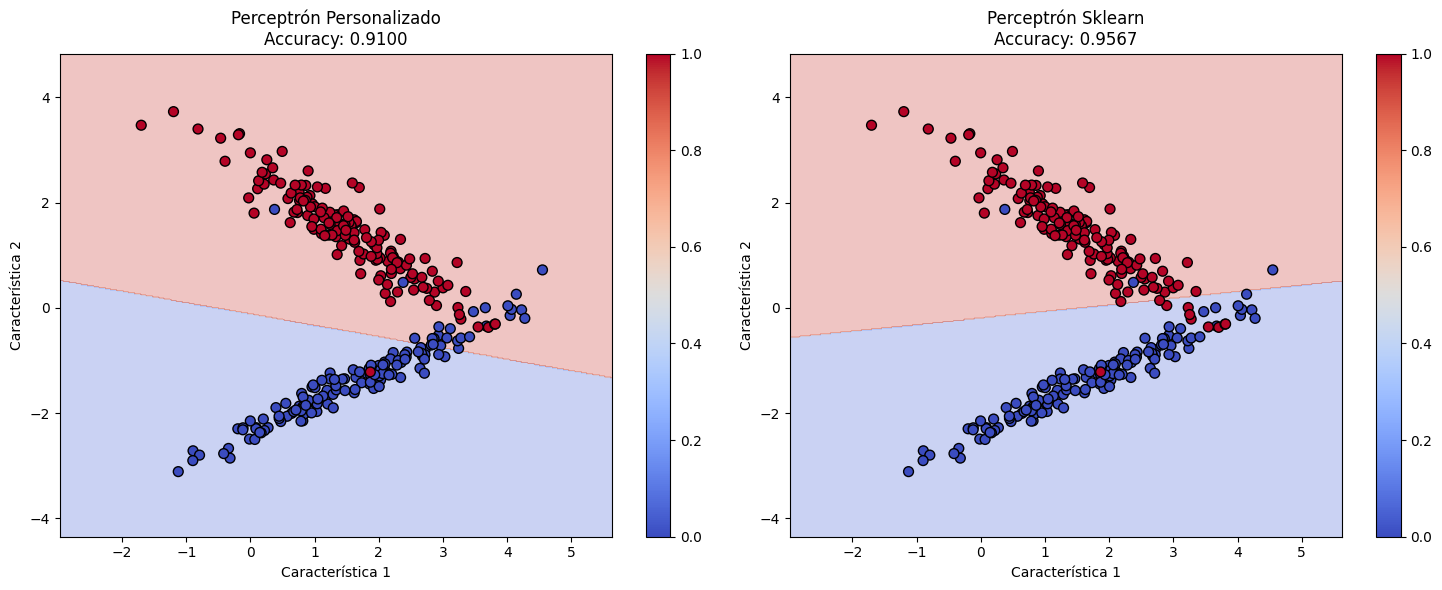

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Perceptrón personalizado
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Subplot 1: Perceptrón personalizado
Z1 = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
ax1.contourf(xx, yy, Z1, alpha=0.3, cmap='coolwarm')
sc1 = ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', s=50)
ax1.set_title(f'Perceptrón Personalizado\nAccuracy: {accuracy:.4f}')
ax1.set_xlabel('Característica 1')
ax1.set_ylabel('Característica 2')
plt.colorbar(sc1, ax=ax1)

# Subplot 2: Perceptrón Sklearn
Z2 = sklearn_perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
ax2.contourf(xx, yy, Z2, alpha=0.3, cmap='coolwarm')
sc2 = ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', s=50)
ax2.set_title(f'Perceptrón Sklearn\nAccuracy: {sklearn_accuracy:.4f}')
ax2.set_xlabel('Característica 1')
ax2.set_ylabel('Característica 2')
plt.colorbar(sc2, ax=ax2)

plt.tight_layout()
plt.show()

## **2. Fuentes de información**
- Rosenblatt, F. (1958). The perceptron: A probabilistic model for information storage and organization in the brain.
- Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. Springer.
- Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
- DeepSeek. (2024). DeepSeek Chat (versión de julio 2024) [Modelo de lenguaje grande]. DeepSeek IA. https://chat.deepseek.com/share/kkj36rnbrlrur3kmw2

